In [2]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
fn = "/Users/elischwat/Development/data/sublimationofsnow/lidar_rasters/l2_test_20230505_20230530_bihourly.nc"

In [4]:
ds_lazy = xr.open_dataset(fn, chunks={
    'time': 1, 'x': 1000, 'y':1000
})

In [5]:
ds_lazy.time

<xarray.DataArray 'time' (time: 312)> Size: 2kB
array(['2023-05-05T00:00:00.000000000', '2023-05-05T02:00:00.000000000',
       '2023-05-05T04:00:00.000000000', ..., '2023-05-30T18:00:00.000000000',
       '2023-05-30T20:00:00.000000000', '2023-05-30T22:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-05-05 ... 2023-05-30T22:00:00

In [6]:
init_condition = ds_lazy.sel(
    # x = slice(-16, 26),
    # y = slice(-20, 16)
).sel(time = '20230505 0000')['surface']

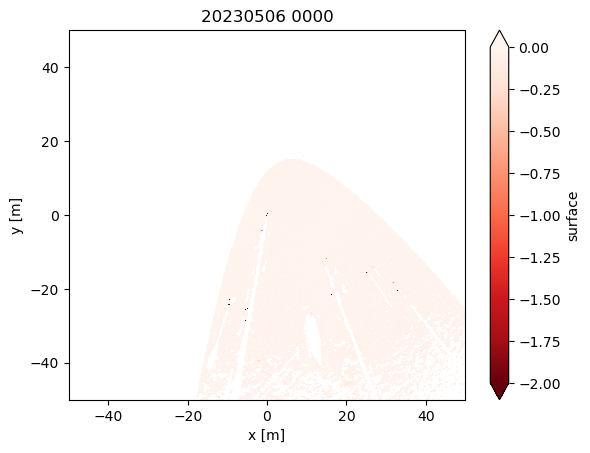

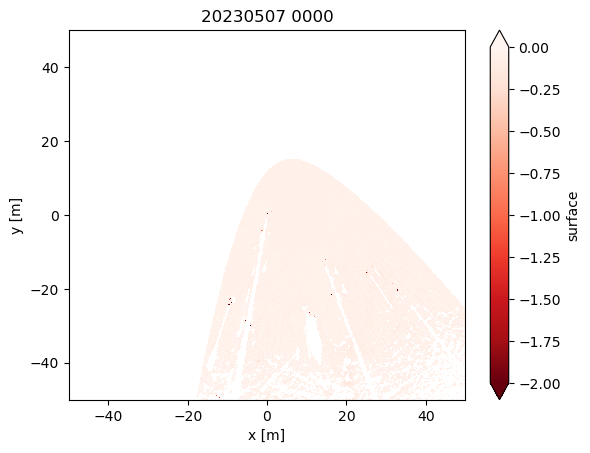

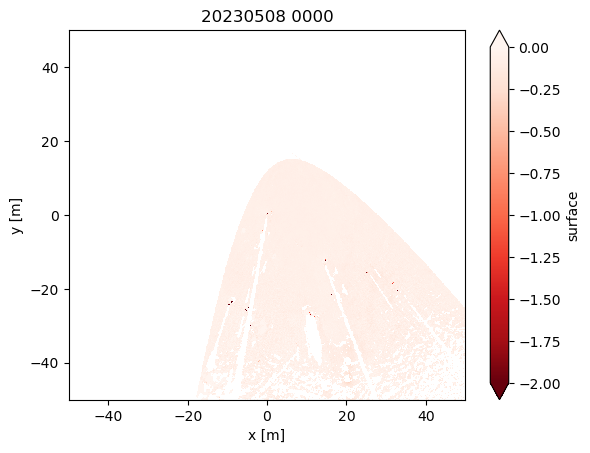

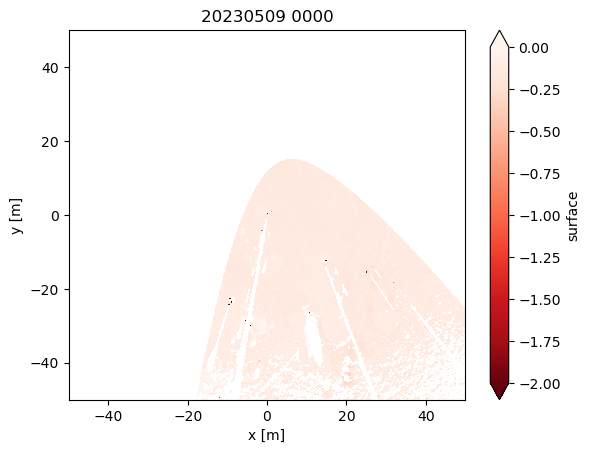

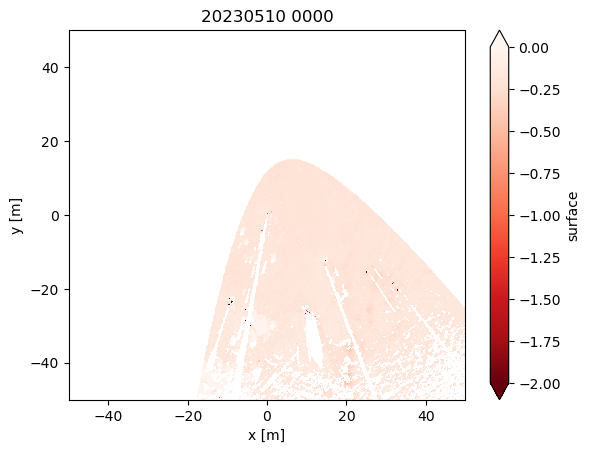

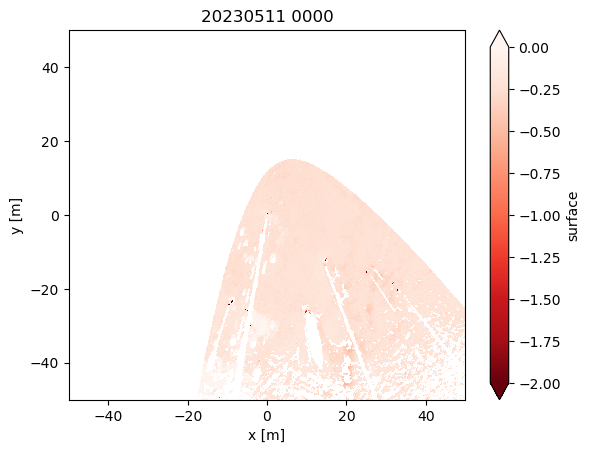

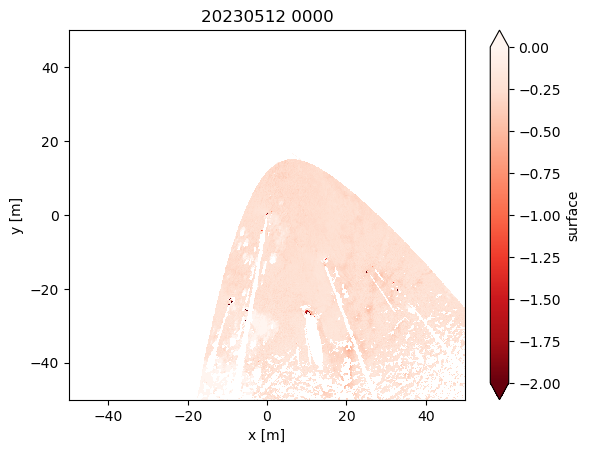

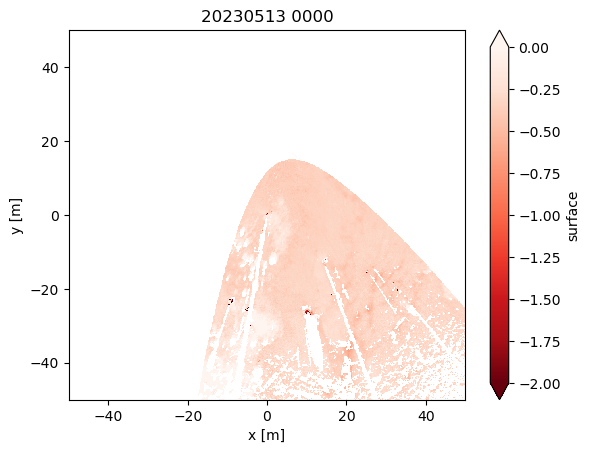

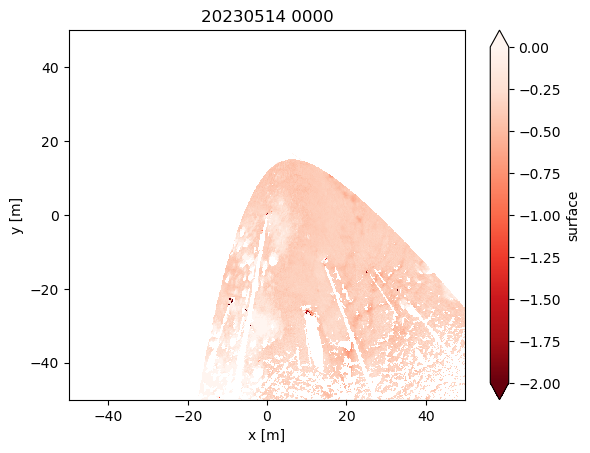

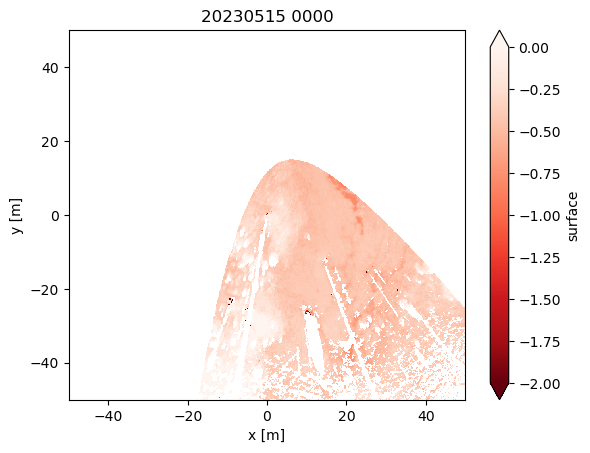

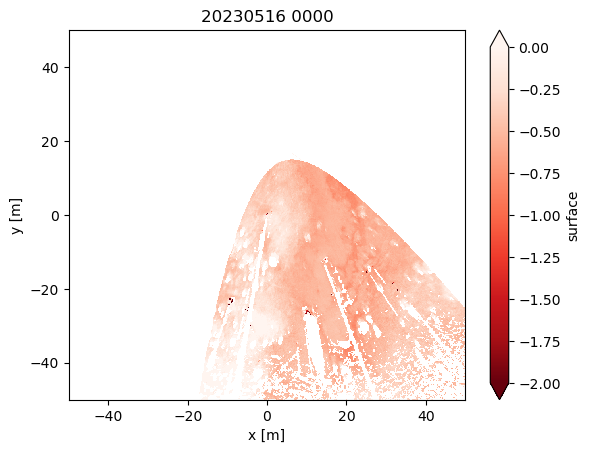

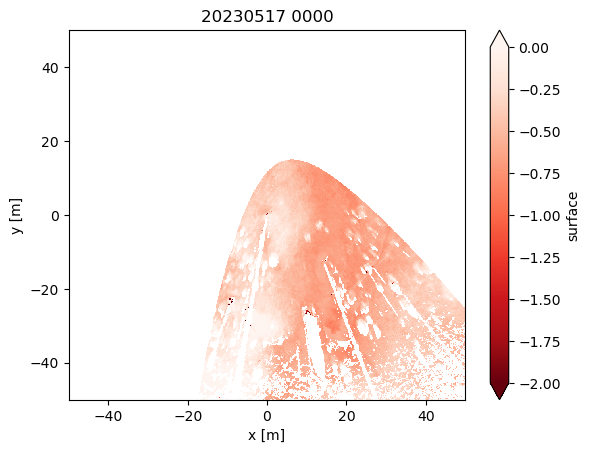

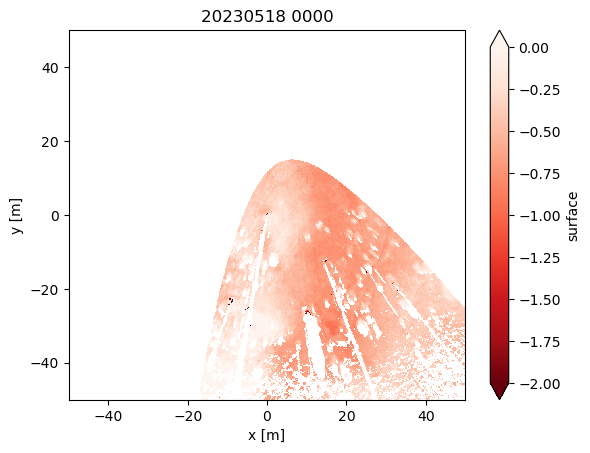

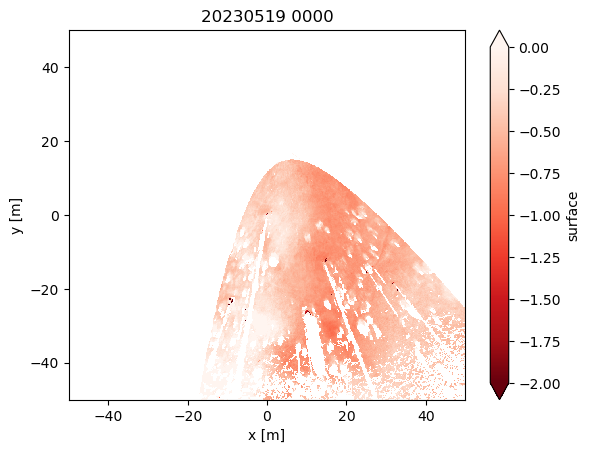

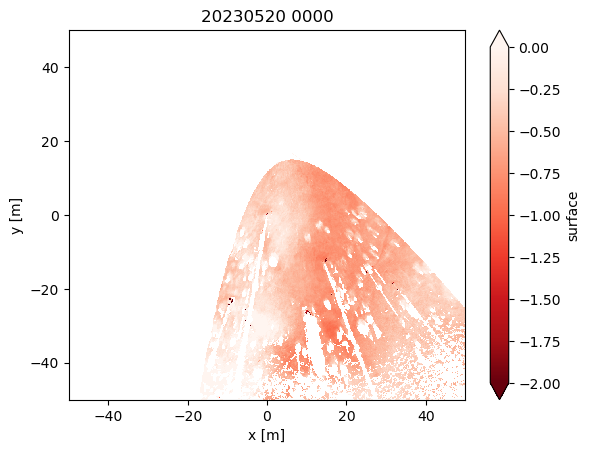

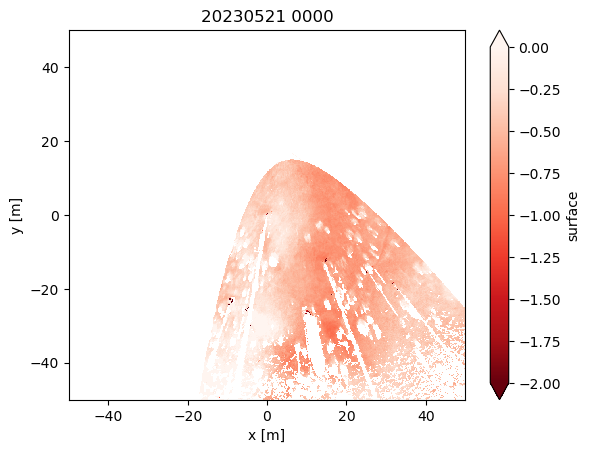

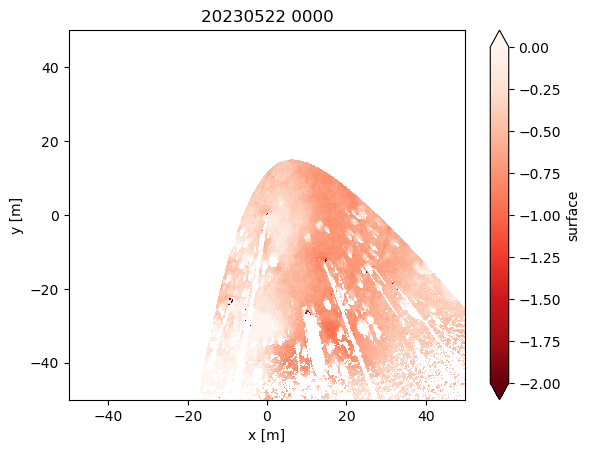

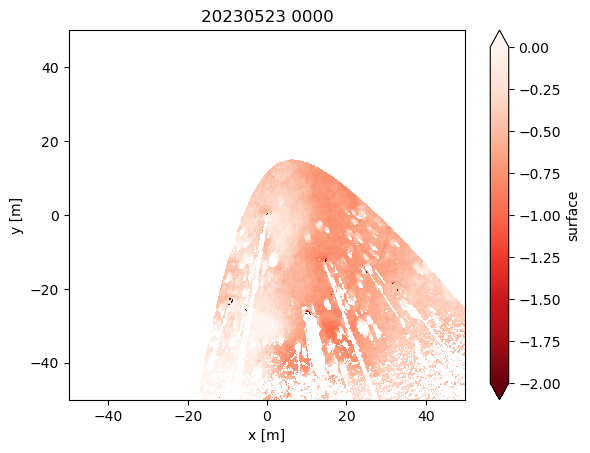

In [7]:
for dt in [
    '20230506 0000',
    '20230507 0000',
    '20230508 0000',
    '20230509 0000',
    '20230510 0000',
    '20230511 0000',
    '20230512 0000',
    '20230513 0000',
    '20230514 0000',
    '20230515 0000',
    '20230516 0000',
    '20230517 0000',
    '20230518 0000',
    '20230519 0000',
    '20230520 0000',
    '20230521 0000',
    '20230522 0000',
    '20230523 0000',
]:
    (ds_lazy.sel(
        # x = slice(-16, 26),
        # y = slice(-20, 16)
    ).sel(time = dt)['surface'] - init_condition).plot(vmin=-2, vmax=0, cmap='Reds_r')
    plt.title(dt)
    plt.show()

In [8]:
ds_lazy.time[-1], ds_lazy.time[0]

(<xarray.DataArray 'time' ()> Size: 8B
 array('2023-05-30T22:00:00.000000000', dtype='datetime64[ns]')
 Coordinates:
     time     datetime64[ns] 8B 2023-05-30T22:00:00,
 <xarray.DataArray 'time' ()> Size: 8B
 array('2023-05-05T00:00:00.000000000', dtype='datetime64[ns]')
 Coordinates:
     time     datetime64[ns] 8B 2023-05-05)

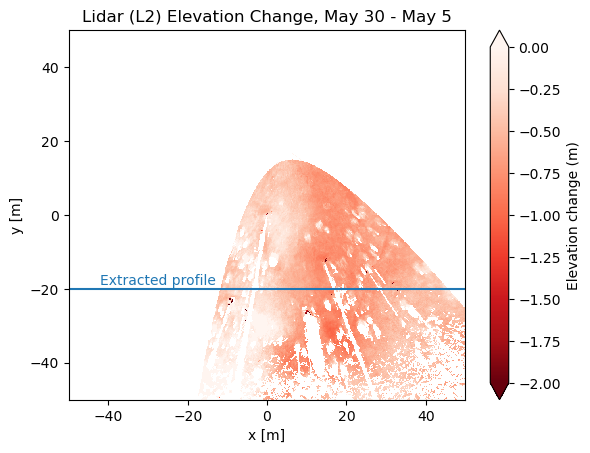

In [9]:
(
    ds_lazy.sel(time = ds_lazy.time[-1])['surface'] 
    - ds_lazy.sel(time = ds_lazy.time[0])['surface']
).plot(vmin=-2, vmax=0, cmap='Reds_r', cbar_kwargs={'label': 'Elevation change (m)'})
plt.title('Lidar (L2) Elevation Change, May 30 - May 5')
plt.axhline(-20)
plt.text(-42, -19, "Extracted profile", color='tab:blue')  # Add text at x=-20, y=-20
plt.show()

In [10]:
ds_diff_lazy = ds_lazy.sel(time = slice(ds_lazy.time[1],  None)) - ds_lazy.sel(time = ds_lazy.time[0])

In [14]:
import altair as alt
alt.data_transformers.disable_max_rows()
import altair as alt
alt.data_transformers.disable_max_rows()

alt.Chart(
    ds_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, ::10, ::].reset_index().dropna()
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q').scale(zero=False).title('Elevation (m)'),
    alt.Color('date(time):O').scale(scheme='turbo').legend(columns=2)
).properties(title = 'Lidar Absolute Elevation') | alt.Chart(
    ds_diff_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, ::10, ::].reset_index().dropna()
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q').scale(zero=False).title('Elevation Change (m)'),
    alt.Color('date(time):O').scale(scheme='turbo').legend(columns=2).title('Day in May')
).properties(title = 'Lidar Elevation Change since May 5')

alt.HConcatChart(...)

In [131]:
src1 = ds_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, ::10, ::].reset_index().dropna()
src2 = ds_diff_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, 
::10, ::].reset_index().dropna()
src1 = src1[src1.time.dt.date.isin([ dt.date(2023, 5, 15), dt.date(2023, 5, 16), dt.date(2023, 5, 23),])]
src2 = src2[src2.time.dt.date.isin([ dt.date(2023, 5, 15), dt.date(2023, 5, 16), dt.date(2023, 5, 23),])]
alt.Chart(
    src1
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q').scale(zero=False).title('Elevation (m)'),
    alt.Color('date(time):O').scale(scheme='turbo')
).properties(title = 'Lidar Absolute Elevation') | alt.Chart(
    src2
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(surface):Q').scale(zero=False).title('Elevation Change (m)'),
    alt.Color('date(time):O').scale(scheme='turbo')
).properties(title = 'Lidar Elevation Change since May 5')

alt.HConcatChart(...)

In [138]:
src1 = ds_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, ::10, ::].reset_index().dropna()
src2 = ds_diff_lazy.interp(y = -20).surface.to_dataframe().dropna().loc[::, 
::10, ::].reset_index().dropna()
src1 = src1[src1.time.dt.date.isin([ dt.date(2023, 5, 15), dt.date(2023, 5, 16), dt.date(2023, 5, 23),])]
src2 = src2[src2.time.dt.date.isin([ dt.date(2023, 5, 15), dt.date(2023, 5, 16), dt.date(2023, 5, 23),])]
alt.Chart(
    src1
).transform_window(
    rolling_median = 'median(surface)',
    frame = [-2,2],
    groupby = ['time'],
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(rolling_median):Q').scale(zero=False).title('Elevation (m)'),
    alt.Color('date(time):O').scale(scheme='turbo')
).properties(title = 'Lidar Absolute Elevation') & alt.Chart(
    src2
).transform_window(
    rolling_median = 'median(surface)',
    frame = [-2,2],
    groupby = ['time'],
).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('mean(rolling_median):Q').scale(zero=False).title('Elevation Change (m)'),
    alt.Color('date(time):O').scale(scheme='turbo')
).properties(title = 'Lidar Elevation Change since May 5')

alt.VConcatChart(...)

# Georeference the raster data (loosely).

0,0 in the dataset is the tower C location.

In [20]:
import geopandas as gpd

In [26]:
towers_gdf = gpd.read_file("../landsat_data/towers.geojson")
towers_gdf_utm = towers_gdf.to_crs("EPSG:32613")
towers_gdf_utm

Tower        lat         lon   alt                        geometry
0    uw  38.942033 -106.972967  2863  POINT (329010.876 4312194.793)
1    ue  38.941783 -106.973250  2861  POINT (328985.717 4312167.579)
2     d  38.941733 -106.972817  2861  POINT (329023.156 4312161.217)
3     c  38.941817 -106.972983  2861  POINT (329008.911 4312170.778)

In [30]:


towers_gdf_utm.set_index('Tower').loc['c']['geometry'].y

(329008.9105453715, 4312170.778238215)

In [35]:
ds_georef_lazy = ds_lazy.assign_coords(
    x = ds_lazy.x + towers_gdf_utm.set_index('Tower').loc['c']['geometry'].x,
    y = ds_lazy.y + towers_gdf_utm.set_index('Tower').loc['c']['geometry'].y
)

In [42]:
import rioxarray as rix

In [51]:
ds_georef_lazy.sel(time = '20230515 1200')['surface'].rio.set_crs('EPSG:32613').rio.to_raster(
    "l2_elevation_20230515_1200.tif"
)

/var/folders/x_/2h52bcjx2px15bhmdpdd748h0000gn/T/ipykernel_91500/3101414676.py:1: FutureWarning: It is recommended to use 'rio.write_crs()' instead. 'rio.set_crs()' will likelybe removed in a future release.
  ds_georef_lazy.sel(time = '20230515 1200')['surface'].rio.set_crs('EPSG:32613').rio.to_raster(


In [52]:
ds_georef_lazy.sel(time = '20230516 1200')['surface'].rio.set_crs('EPSG:32613').rio.to_raster(
    "l2_elevation_20230516_1200.tif"
)

/var/folders/x_/2h52bcjx2px15bhmdpdd748h0000gn/T/ipykernel_91500/2975262134.py:1: FutureWarning: It is recommended to use 'rio.write_crs()' instead. 'rio.set_crs()' will likelybe removed in a future release.
  ds_georef_lazy.sel(time = '20230516 1200')['surface'].rio.set_crs('EPSG:32613').rio.to_raster(


In [53]:
ds_georef_lazy.sel(time = '20230523 1200')['surface'].rio.set_crs('EPSG:32613').rio.to_raster(
    "l2_elevation_20230523_1200.tif"
)

/var/folders/x_/2h52bcjx2px15bhmdpdd748h0000gn/T/ipykernel_91500/1069738482.py:1: FutureWarning: It is recommended to use 'rio.write_crs()' instead. 'rio.set_crs()' will likelybe removed in a future release.
  ds_georef_lazy.sel(time = '20230523 1200')['surface'].rio.set_crs('EPSG:32613').rio.to_raster(
